# Concept

(term-document-matrix)=
## Term-Document Matrix

In a **term-document matrix**, each row represents a **word** in the vocabulary, and each column represents a **document** from a collection of **documents/corpus**.

In {numref}`term-document-table`, we construct a simple $4 \times 4$ **term-document matrix** for four Shakespeare plays.

```{list-table} Number of occurrences of selected words in four Shakespeare plays.
:header-rows: 1
:name: term-document-table
:class: align-center

* - 
  - As You Like It
  - Twelfth Night
  - Julius Caesar
  - Henry V
* - battle
  - 1
  - 0
  - 7
  - 13
* - good
  - 114
  - 80
  - 62
  - 89
* - fool
  - 36
  - 58
  - 1
  - 4
* - wit
  - 20
  - 15
  - 2
  - 3
```

Each cell in the table is the number of times that word $t$ appears in document $d$.
We present the **term-document matrix** in {numref}`term-document-table` as a colored
table below, highlighting the columns of the table.

```{list-table} Number of occurrences of selected words in four Shakespeare plays
:header-rows: 1
:name: term-document-table-color
:class: align-center

* - 
  - As You Like It
  - Twelfth Night
  - Julius Caesar
  - Henry V
* - battle
  - <div style="background-color: #FF3D00; border-radius: 50%; padding: 5px;">1</div>
  - <div style="background-color: #008000; border-radius: 50%; padding: 5px;">0</div>
  - <div style="background-color: #0000FF; border-radius: 50%; padding: 5px;">7</div>
  - <div style="background-color: #FFA500; border-radius: 50%; padding: 5px;">13</div>
* - good
  - <div style="background-color: #FF3D00; border-radius: 50%; padding: 5px;">114</div>
  - <div style="background-color: #008000; border-radius: 50%; padding: 5px;">80</div>
  - <div style="background-color: #0000FF; border-radius: 50%; padding: 5px;">62</div>
  - <div style="background-color: #FFA500; border-radius: 50%; padding: 5px;">89</div>
* - fool
  - <div style="background-color: #FF3D00; border-radius: 50%; padding: 5px;">36</div>
  - <div style="background-color: #008000; border-radius: 50%; padding: 5px;">58</div>
  - <div style="background-color: #0000FF; border-radius: 50%; padding: 5px;">62</div>
  - <div style="background-color: #FFA500; border-radius: 50%; padding: 5px;">4</div>
* - wit
  - <div style="background-color: #FF3D00; border-radius: 50%; padding: 5px;">20</div>
  - <div style="background-color: #008000; border-radius: 50%; padding: 5px;">15</div>
  - <div style="background-color: #0000FF; border-radius: 50%; padding: 5px;">2</div>
  - <div style="background-color: #FFA500; border-radius: 50%; padding: 5px;">3</div>
```

We can represent this table as a matrix:

$$
\begin{equation*}
\mathbf{X} = \begin{bmatrix}
\textcolor{red}{1} & \textcolor{green}{0} & \textcolor{blue}{7} & \textcolor{orange}{13} \\
\textcolor{red}{114} & \textcolor{green}{80} & \textcolor{blue}{62} & \textcolor{orange}{89} \\
\textcolor{red}{36} & \textcolor{green}{58} & \textcolor{blue}{1} & \textcolor{orange}{4} \\
\textcolor{red}{20} & \textcolor{green}{15} & \textcolor{blue}{2} & \textcolor{orange}{3}
\end{bmatrix}_{4 \times 4} \in \mathbb{R}^{4 \times 4}
\end{equation*}
$$ (eq:term-document-matrix)

Then we can define each column as a sample represented as a document, and each value in the column to be the
feature as the number of times a word appears in a document.

More concretely, the term-document matrix of {numref}`term-document-table` was first defined as part of the vector
space model of information retrieval (Salton, 1971). In this model, a document is vector space
model
represented as a count vector, a column in {numref}`term-document-table-color` {cite}`jurafsky_martin_2022`.

Readers who are familiar with Machine Learning will start to notice that this matrix has very similar representation to the
[Design Matrix](https://en.wikipedia.org/wiki/Design_matrix).

```{prf:remark} Number of Features
:label: term-document-remark

The authors remarked that this example has only 4 dimensions (words), and 4 samples (documents). However, in practice, the
there can be $D$ documents and $T$ words. Consequently, $\mathbf{X}$ will have $D$ rows and $T$ columns.

Each document is treated as a sample $\mathbf{x}^{(d)} \in \mathbb{R}^{D}$, where $d$ is the index of the sample. But 
each document may have different amount of vocabulary, and how do we fix the number of features $T$?

First, we define the number of features to be the number of unique vocabulary (words) in the entire corpus of documents being analyzed.
Each word represents a feature, and the size of the feature space is determined by the number of unique terms that are present in the corpus.

For example, if we have a corpus of $100$ documents and $1000$ unique words across all documents, then the feature space will have $1000$ features.
```

### Motivation

The motivation of the **term-document matrix** is to represent the number of occurrences of each word in a document.
It's original purpose is [**Information Retrieval**](https://en.wikipedia.org/wiki/Information_retrieval#:~:text=Information%20retrieval%20is%20the%20science,of%20texts%2C%20images%20or%20sounds.). The idea is that we can use the **term-document matrix** to find **similar** documents
based on the number of occurrences of each word.

```{prf:example} Information Retrieval
:label: term-document-example-info-retrieval

The idea is that if two documents have similar number of occurrences of a word, then they are likely to be similar.
Imagine two documents that talks about sports, then words such as "ball", "basketball", "football", "soccer", "goal", "score", "win", "lose", etc
will be common in both documents. Therefore, we can say that two documents that are similar will tend to have similar words {cite}`jurafsky_martin_2022`.

In our example, *As You Like It* and *Twelfth Night* are similar in the sense that they are both comedies. Therefore, they will tend
to have similar words such as "good", "fool", "wit", etc. Less formally, their column vectors will be similar than that of
*Julius Caesar* and *Henry V*.

$$
\begin{align*}
\mathbf{x}^{(1)} = \begin{bmatrix}
1 \\ 114 \\ 36 \\ 20
\end{bmatrix} \approx \mathbf{x}^{(2)} = \begin{bmatrix}
0 \\ 80 \\ 58 \\ 15
\end{bmatrix}
\end{align*}
$$

From the above vectors comparison, if we just take 2 dimensions, say dimensions of `fool` and `battle`,
we can see that there are 36 and 58 occurences of `fool` in *As You Like It* and *Twelfth Night* respectively, 
but only a mere 1 and 4 occurences in *Julius Caesar* and *Henry V* respectively. 
Intuitively, we expect a comedy to have more `fool` than that of other genres. And from the
raw absolute numbers, we can see that 36 and 58 are *closer* when compared to 1 and 4.

Similarly, for the word `battle`, there are 7 and 13 occurences in *Julius Caesar* and *Henry V* respectively,
but only 1 and 0 occurences in *As You Like It* and *Twelfth Night* respectively. And we also can
conclude that 7 and 13 are *closer* than 1 and 0.

Therefore, we can say that *As You Like It* and *Twelfth Night* are more similar than *Julius Caesar* and *Henry V*.

Note that we have yet to define the notion of *closeness*. We will formalize this intuition later.
```

### Visualizations

Let's plot out on the 2D plane to have a better visualization.

In [8]:
import matplotlib.pyplot as plt
from matplotlib.quiver import Quiver
import numpy as np
from typing import Any, Dict
from rich import print
from rich.pretty import pprint

Consider the following numpy array `X` representing the one defined in equation
{eq}`eq:term-document-matrix`.


In [9]:
X = np.array(
    [
        [1, 0, 7, 13],
        [114, 80, 62, 89],
        [36, 58, 1, 4],
        [20, 15, 2, 3],
    ]
)

Define a function `plot_quiver` to plot out each vector in the matrix.

In [10]:
def plot_quiver(
    ax: plt.Axes,
    x: np.ndarray,
    y: np.ndarray,
    u: np.ndarray,
    v: np.ndarray,
    angles: str = "xy",
    scale_units: str = "xy",
    scale: float = 1,
    **kwargs: Dict[str, Any]
) -> Quiver:
    """Plot quiver."""
    return ax.quiver(
        x, y, u, v, angles=angles, scale_units=scale_units, scale=scale, **kwargs
    )

Let's create a 2d-matrix with only the features `fool` and `battle`, as follows.

In [11]:
X_2d = np.array(
    [
        [4, 13],
        [1, 7],
        [36, 1],
        [58, 0],
    ]
)
pprint(X_2d)

array([[ 4, 13],
│      [ 1,  7],
│      [36,  1],
│      [58,  0]])

In [12]:
documents = [
    "Henry V",
    "Julius Caesar",
    "As You Like It",
    "Twelfth Night",
]

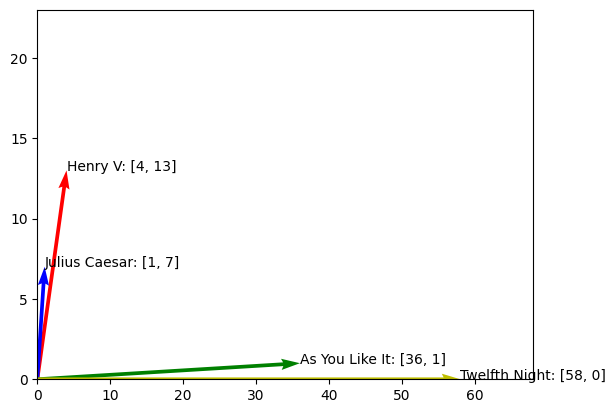

In [13]:
fig, ax = plt.subplots()

# set x and y limits to display only the first quadrant
ax.set_xlim([0, X_2d[:, 0].max() + 10])
ax.set_ylim([0, X_2d[:, 1].max() + 10])

# plot the quiver arrows
quiver = plot_quiver(
    ax,
    np.zeros(X_2d.shape[0]),
    np.zeros(X_2d.shape[0]),
    X_2d[:, 0],
    X_2d[:, 1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["r", "b", "g", "y"],
)
# annotate the arrows with the words
for i, word in enumerate(documents):
    word_vector = f"{word}: [{X_2d[i, 0]}, {X_2d[i, 1]}]"
    ax.annotate(word_vector, (X_2d[i, 0], X_2d[i, 1]))
plt.show();

Even though the notion of closeness is
not defined, one can just treat the angle between two vectors as a measure of closeness.
We see that indeed the vectors are closer to each other for the two comedy plays
and further apart for the two tragedy plays. 

### Similar Documents have Similar Words

The quote below summarizes the intuition of the term-document matrix. 

> **Similar documents have similar words.**

(words-as-vectors-document-dimensions)=
## Words as Vectors: Document Dimensions

In the previous section, we represented each document $d$ as a vector $\mathbf{x}^{(d)}$ of dimension $T$ (number of words in the vocabulary).

Now, we can turn the tables and represent each word as a vector instead. Define the number of 
total words in the vocabulary as $T$, and the number of documents as $D$ (essentially swapping the notations).
Then, we see that each word $t$ is represented as a vector $\mathbf{x}^{(t)}$ of dimension $D$.

The {numref}`term-document-table-color-doc-dimensions` below shows the new level changes in the term-document table
when compared to the {numref}`term-document-table-color` table.

```{list-table}  Number of occurrences of selected words in four Shakespeare plays
:header-rows: 1
:name: term-document-table-color-doc-dimensions
:class: align-center

* - 
  - As You Like It
  - Twelfth Night
  - Julius Caesar
  - Henry V
* - battle
  - <div style="background-color: #FF3D00; border-radius: 50%; padding: 5px;">1</div>
  - <div style="background-color: #FF3D00; border-radius: 50%; padding: 5px;">0</div>
  - <div style="background-color: #FF3D00; border-radius: 50%; padding: 5px;">7</div>
  - <div style="background-color: #FF3D00; border-radius: 50%; padding: 5px;">13</div>
* - good
  - <div style="background-color: #0000FF; border-radius: 50%; padding: 5px;">114</div>
  - <div style="background-color: #0000FF; border-radius: 50%; padding: 5px;">80</div>
  - <div style="background-color: #0000FF; border-radius: 50%; padding: 5px;">62</div>
  - <div style="background-color: #0000FF; border-radius: 50%; padding: 5px;">89</div>
* - fool
  - <div style="background-color: #008000; border-radius: 50%; padding: 5px;">36</div>
  - <div style="background-color: #008000; border-radius: 50%; padding: 5px;">58</div>
  - <div style="background-color: #008000; border-radius: 50%; padding: 5px;">62</div>
  - <div style="background-color: #008000; border-radius: 50%; padding: 5px;">4</div>
* - wit
  - <div style="background-color: #FFA500; border-radius: 50%; padding: 5px;">20</div>
  - <div style="background-color: #FFA500; border-radius: 50%; padding: 5px;">15</div>
  - <div style="background-color: #FFA500; border-radius: 50%; padding: 5px;">2</div>
  - <div style="background-color: #FFA500; border-radius: 50%; padding: 5px;">3</div>
```

Let's see how the new matrix look.

$$
\begin{equation*}
\mathbf{X} = \begin{bmatrix}
\textcolor{red}{1} & \textcolor{red}{0} & \textcolor{red}{7} & \textcolor{red}{13} \\
\textcolor{green}{114} & \textcolor{green}{80} & \textcolor{green}{62} & \textcolor{green}{89} \\
\textcolor{blue}{36} & \textcolor{blue}{58} & \textcolor{blue}{1} & \textcolor{blue}{4} \\
\textcolor{orange}{20} & \textcolor{orange}{15} & \textcolor{orange}{2} & \textcolor{orange}{3}
\end{bmatrix}_{4 \times 4} \in \mathbb{R}^{4 \times 4}
\end{equation*}
$$ (eq:term-document-matrix-doc-dimensions)


And each row is now a sample corresponding to a word, with each value now the feature corresponding to the document.

Simiarly, similar documents tend to have similar words, and similar words tend to appear in similar documents.
So this format of term-document matrix allows us to represent the meaning of a word by the document it tends to 
appear in {cite}`jurafsky_martin_2022`. 

For example, let's look at the word `fool`, now it is $\begin{bmatrix} 36 & 58 & 1 & 4 \end{bmatrix}$,
and we see that it appears more in *As You Like It* and *Twelfth Night* than in *Julius Caesar* and *Henry V*.

The distinction is that we are comparing words similarity instead of documents similarity.

### Similar Words have Similar Documents

The quote below summarizes the intuition of the term-document matrix with words as vectors.

> **Similar words have similar documents.**

## Words as Vectors: Word Dimensions (Term-Term Matrix)

An alternative to using the term-document matrix to represent words as vectors of document counts, is to use the term-term matrix, also called the word-word matrix or the term-context matrix, in which the columns are labeled by words rather than documents. This matrix is thus of dimensionality $|V| \times|V|$ and each cell records the number of times the row (target) word and the column (context) word co-occur in some context in some training corpus. The context could be the document, in which case the cell represents the number of times the two words appear in the same document. It is most common, however, to use smaller contexts, generally a window around the word, for example of 4 words to the left and 4 words to the right, in which case the cell represents the number of times (in some training corpus) the column word occurs in such a $\pm 4$ word window around the row word. For example here is one example each of some words in their windows:

- after dinner we had **cherry** pie, a traditional dessert 
- often mixed, such as **strawberry** rhubarb pie. Apple pie 
- computer peripherals and personal **digital** assistants. These devices usually
- a computer. This includes **information** available on the internet

If we then take every occurrence of each word (say **strawberry**) and count the context words around it, we get a word-word co-occurrence matrix. {numref}`term-term-table` shows a simplified subset of the word-word co-occurrence matrix for these four words computed from the Wikipedia corpus (Davies, 2015).

```{list-table} Co-occurence vectors for four words in the Wikipedia corpus.  showing six ofthe dimensions (hand-picked for pedagogical purposes). The vector for digital is outlined in red. Note that a real vector would have vastly more dimensions and thus be much sparser.
:header-rows: 1
:name: term-term-table

* - 
  - aardvark
  - ...
  - computer
  - data
  - result
  - pie
  - sugar
  - ...
* - cherry
  - 0
  - ...
  - 2
  - 8
  - 9
  - 442
  - 25
  - ...
* - strawberry
  - 0
  - ...
  - 0
  - 0
  - 1
  - 60
  - 19
  - ...
* - digital
  - $\textcolor{red}{0}$
  - $\textcolor{red}{\ldots}$
  - $\textcolor{red}{1670}$
  - $\textcolor{red}{1683}$
  - $\textcolor{red}{85}$
  - $\textcolor{red}{5}$
  - $\textcolor{red}{4}$
  - $\textcolor{red}{\ldots}$
* - information
  - 0
  - ...
  - 3325
  - 3982
  - 378
  - 5
  - 13
  - ...
```

Note that this matrix is in fact $\left|V\right| \times \left|V\right|$ in size, where $\left|V\right|$ is the size of the vocabulary,
but it shows only 4 rows for illustrative purposes.


Note in {numref}`term-term-table` that the two words *cherry* and *strawberry* are more similar to
each other (both pie and sugar tend to occur in their window) than they are to other
words like digital; conversely, digital and information are more similar to each other
than, say, to strawberry. 

Let's plot them out and see the spatial distance of the vectors corresponding to the row
`digital` and `information` in the matrix. Note we are only taking two features (dimensions)
for visualization purposes (`data` and `computer` column).

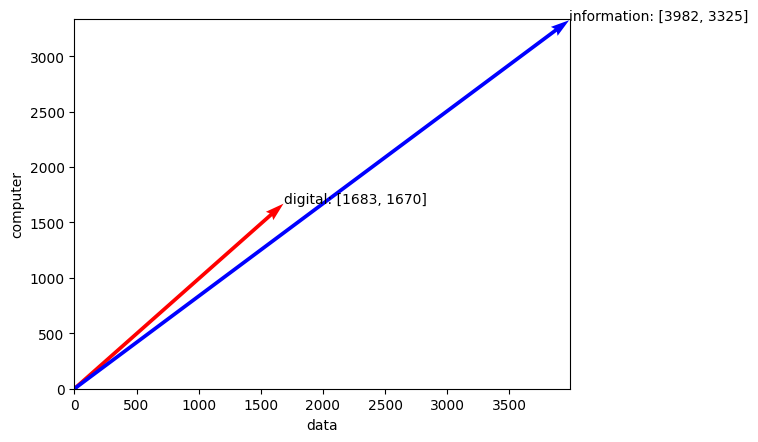

In [19]:
digital = np.array([1683, 1670])
information = np.array([3982, 3325])
annotations = ["digital", "information"]
X_2d = np.array([digital, information])

fig, ax = plt.subplots()

# set x and y limits to display only the first quadrant
ax.set_xlim([0, X_2d[:, 0].max() + 10])
ax.set_ylim([0, X_2d[:, 1].max() + 10])

# plot the quiver arrows
quiver = plot_quiver(
    ax,
    np.zeros(X_2d.shape[0]),
    np.zeros(X_2d.shape[0]),
    X_2d[:, 0],
    X_2d[:, 1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["r", "b", "g", "y"],
)
ax.set_xlabel("data")
ax.set_ylabel("computer")
# annotate the arrows with the words
for i, word in enumerate(annotations):
    word_vector = f"{word}: [{X_2d[i, 0]}, {X_2d[i, 1]}]"
    ax.annotate(word_vector, (X_2d[i, 0], X_2d[i, 1]))
plt.show();

## References and Further Readings

- Jurafsky, Dan, and James H. Martin. "Chapter 6.3. Words and Vectors." In Speech and Language Processing: An Introduction to Natural Language Processing, Computational Linguistics, and Speech Recognition. Pearson, 2022.